In [ ]:
# CISD41 Project: Analyzing Los Angeles International Airport Flight Operations by Month

## Introduction

This project involves a comprehensive analysis of flight operations data at Los Angeles International Airport (LAX). 
The dataset, which can be found [here](https://www.kaggle.com/datasets/cityofLA/los-angeles-international-airport-data/data), 
contains detailed records of monthly flight operations at LAX. 
The primary objective of this analysis is to explore trends, patterns, and relationships within the data, utilizing 
various statistical and data visualization techniques learned throughout the course.

### Project Rubric:

| Topic | Points |
| --- | --- |
| Presentation | 10 |
| Comments | 10 |
| Asking the appropriate questions | 10 |
| Importing Data | 10 |
| Cleaning Data | 10 |
| Organizing data | 10 |
| Functions | 10 |
| Data Visualization | 40 |
| Descriptive Statistics | 20 |
| Pivot tables | 10 |
| Quantitative Data Exploratory Descriptive Statistics | 20 |
| Testing hypothesis | 15 |
| Summary and Conclusion | 10 |


In [ ]:
# Flight Operations Analysis at Los Angeles International Airport

This project aims to analyze flight operations at Los Angeles International Airport (LAX) over time, categorized by flight 
type and other relevant attributes. 
The analysis includes data cleaning, visualization, descriptive statistics, correlation analysis, and hypothesis testing.

## Questions to be Answered
1. How is the dataset structured, and what does the initial data look like?
2. What are the necessary data cleaning steps to prepare the data for analysis?
3. How can the data be organized to facilitate meaningful analysis?
4. What functions can be created to simplify data visualization and analysis?
5. How can we visualize the flight operations over time for different flight types?
6. What are the descriptive statistics for domestic and international charter flights?
7. How can pivot tables be used to summarize the data?
8. What are the correlations between different numerical attributes in the dataset?
9. What insights can we gain from hypothesis testing regarding different flight types?
10. How do flight operations vary month-by-month?
11. What trends can be observed in total operations over the years?
12. How can we analyze the number of charter flights (domestic and international) over the years?

In [ ]:
## 1. Importing Libraries and Data

#First, we will import the necessary libraries for data manipulation, visualization, and statistical analysis. 
#Then, we will load the dataset and display its initial rows to get an overview of its structure and contents.

In [ ]:
Question 1: How is the dataset structured, and what does the initial data look like?

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
file_path = 'data/los-angeles-international-airport-flight-operations-by-month.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DataExtractDate         1686 non-null   object
 1   ReportPeriod            1686 non-null   object
 2   FlightType              1686 non-null   object
 3   Arrival_Departure       1686 non-null   object
 4   Domestic_International  1686 non-null   object
 5   FlightOpsCount          1686 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 79.2+ KB


In [3]:
# Display the first few rows of the dataset
df.head()

,DataExtractDate,ReportPeriod,FlightType,Arrival_Departure,Domestic_International,FlightOpsCount
0,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Charter,Arrival,Domestic,57
1,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Charter,Arrival,International,299
2,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Charter,Departure,Domestic,62
3,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Charter,Departure,International,5
4,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Commuter,Arrival,Domestic,5996


In [ ]:
2. Data Cleaning

In [ ]:
Question 2: What are the necessary data cleaning steps to prepare the data for analysis?

In [4]:
# Convert date columns to datetime
df['DataExtractDate'] = pd.to_datetime(df['DataExtractDate'])
df['ReportPeriod'] = pd.to_datetime(df['ReportPeriod'])

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Fill or drop missing values if necessary
df.dropna(inplace=True)

DataExtractDate           0
ReportPeriod              0
FlightType                0
Arrival_Departure         0
Domestic_International    0
FlightOpsCount            0
dtype: int64


In [ ]:
3. Data Organization

In [ ]:
Question 3: How can the data be organized to facilitate meaningful analysis?

In [6]:
# Convert date columns to datetime
df['DataExtractDate'] = pd.to_datetime(df['DataExtractDate'])
df['ReportPeriod'] = pd.to_datetime(df['ReportPeriod'])

# Group by 'ReportPeriod' and 'FlightType' and sum the 'FlightOpsCount'
organized_df = df.groupby(['ReportPeriod', 'FlightType'])['FlightOpsCount'].sum().reset_index()

# Display the organized data
organized_df.head()

,ReportPeriod,FlightType,FlightOpsCount
0,2006-01-01,Charter,423
1,2006-01-01,Commuter,12053
2,2006-01-01,Scheduled,35472
3,2006-02-01,Charter,244
4,2006-02-01,Commuter,11106


In [ ]:
4. Functions

In [ ]:
Question 4: What functions can be created to simplify data visualization and analysis?

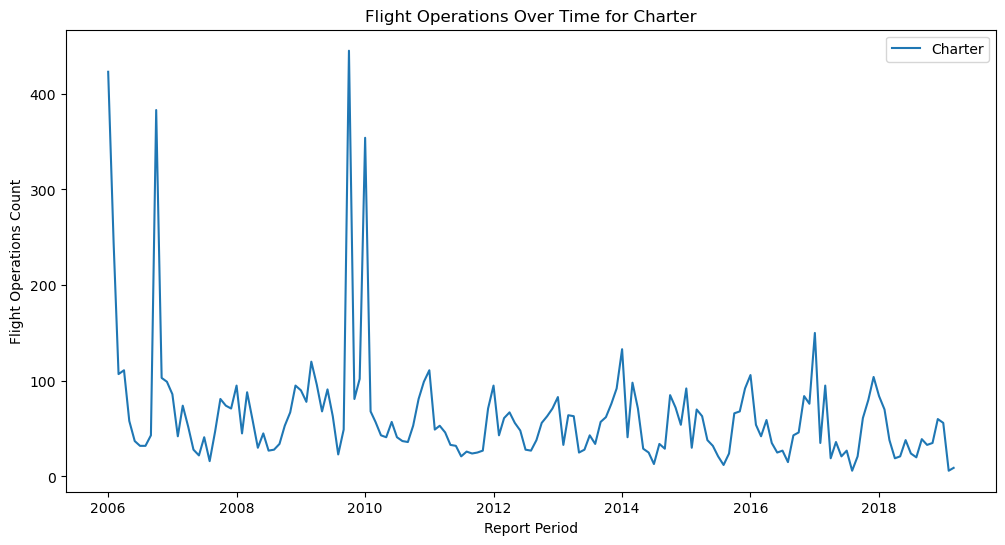

In [10]:
import matplotlib.pyplot as plt

def plot_flight_operations(data, flight_type):
    plt.figure(figsize=(12, 6))
    subset = data[data['FlightType'] == flight_type]
    plt.plot(subset['ReportPeriod'], subset['FlightOpsCount'], label=flight_type)
    plt.title(f'Flight Operations Over Time for {flight_type}')
    plt.xlabel('Report Period')
    plt.ylabel('Flight Operations Count')
    plt.legend()
    plt.show()

# Example call to the function
plot_flight_operations(organized_df, 'Charter')

In [ ]:
5. Data Visualization

In [ ]:
Question 5: How can we visualize the flight operations over time for different flight types?

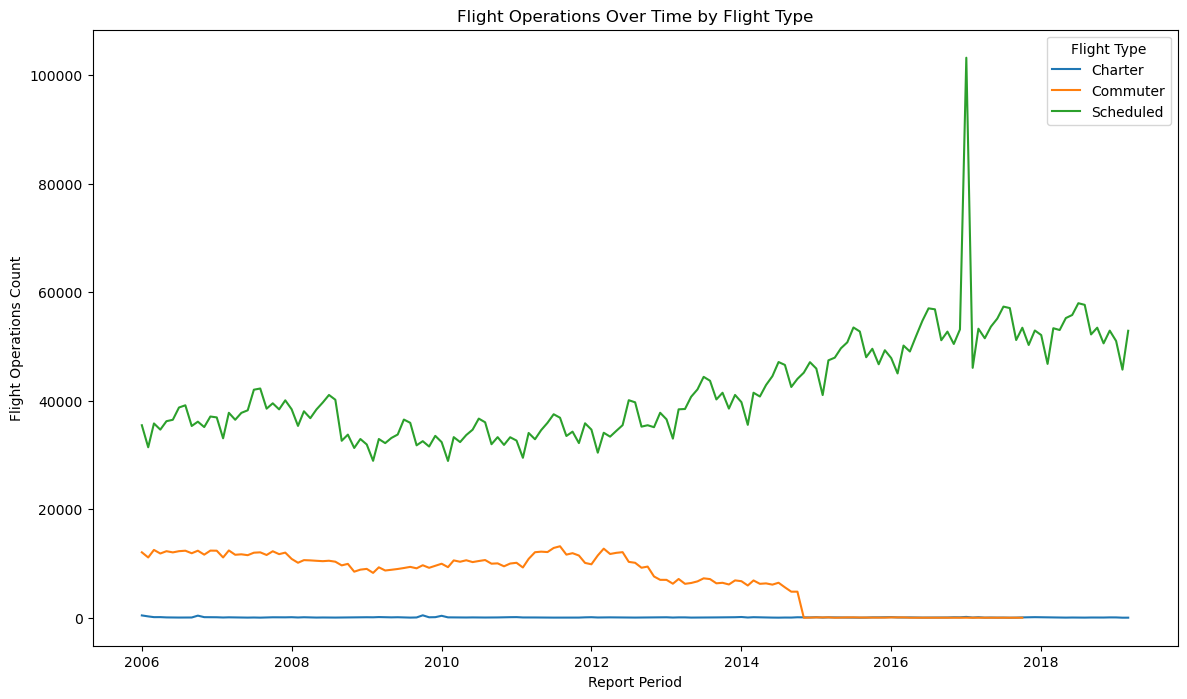

In [11]:
# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='ReportPeriod', y='FlightOpsCount', hue='FlightType', data=organized_df)
plt.title('Flight Operations Over Time by Flight Type')
plt.xlabel('Report Period')
plt.ylabel('Flight Operations Count')
plt.legend(title='Flight Type')
plt.show()

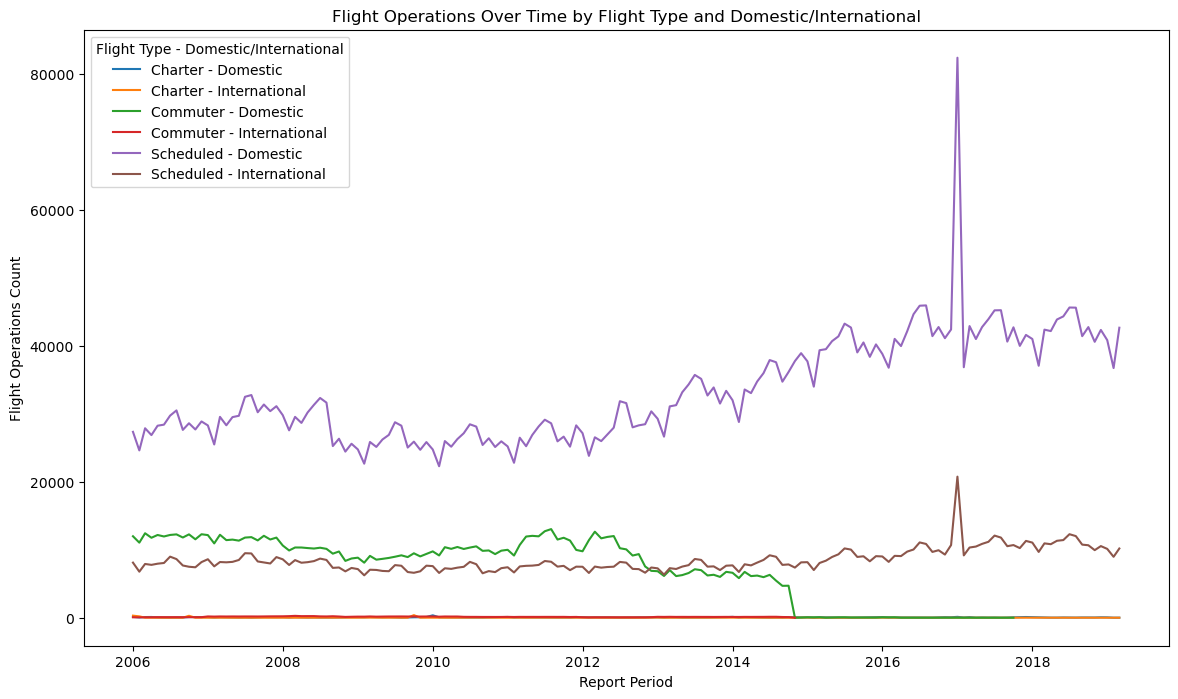

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to combine flight type and domestic/international for better visualization
df['FlightType_Domestic_International'] = df['FlightType'] + ' - ' + df['Domestic_International']

# Group by 'ReportPeriod' and 'FlightType_Domestic_International' and sum the 'FlightOpsCount'
organized_df_di = df.groupby(['ReportPeriod', 'FlightType_Domestic_International'])['FlightOpsCount'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='ReportPeriod', y='FlightOpsCount', hue='FlightType_Domestic_International', data=organized_df_di)
plt.title('Flight Operations Over Time by Flight Type and Domestic/International')
plt.xlabel('Report Period')
plt.ylabel('Flight Operations Count')
plt.legend(title='Flight Type - Domestic/International')
plt.show()

In [ ]:
6. Descriptive Statistics

In [ ]:
Question 6: What are the descriptive statistics for domestic and international charter flights?

                     DataExtractDate                   ReportPeriod  \
count                           1686                           1686   
mean   2015-01-22 18:04:12.009489920  2012-01-28 05:23:42.064057088   
min              2014-05-01 00:00:00            2006-01-01 00:00:00   
25%              2014-05-01 00:00:00            2009-01-01 00:00:00   
50%              2014-05-01 00:00:00            2011-12-01 00:00:00   
75%              2015-02-15 08:00:17            2014-12-01 00:00:00   
max              2019-05-15 08:00:42            2019-03-01 00:00:00   
std                              NaN                            NaN   

       FlightOpsCount  
count     1686.000000  
mean      4556.969158  
min          0.000000  
25%         19.000000  
50%       2986.000000  
75%       5398.000000  
max      22989.000000  
std       6298.001728  


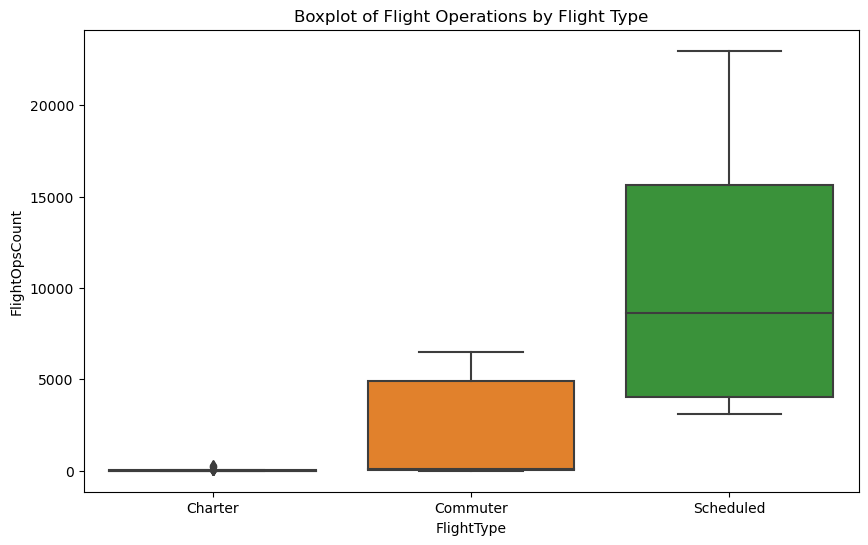

In [13]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='FlightType', y='FlightOpsCount', data=df)
plt.title('Boxplot of Flight Operations by Flight Type')
plt.show()

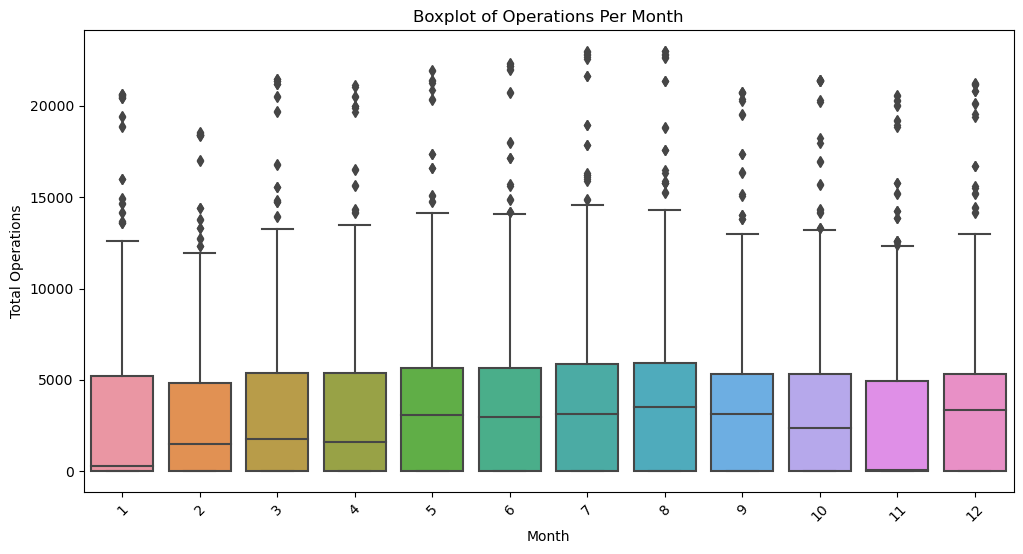

In [22]:
# Extract month from 'ReportPeriod'
df['Month'] = df['ReportPeriod'].dt.month

# Create a boxplot of operations per month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='FlightOpsCount', data=df)
plt.title('Boxplot of Operations Per Month')
plt.xlabel('Month')
plt.ylabel('Total Operations')
plt.xticks(rotation=45)
plt.show()


Descriptive Statistics for Domestic Charter Flights:
count    320.000000
mean      24.806250
std       19.631718
min        2.000000
25%       13.000000
50%       21.500000
75%       33.000000
max      269.000000
Name: FlightOpsCount, dtype: float64

Descriptive Statistics for International Charter Flights:
count    268.000000
mean       8.391791
std       30.684810
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max      299.000000
Name: FlightOpsCount, dtype: float64


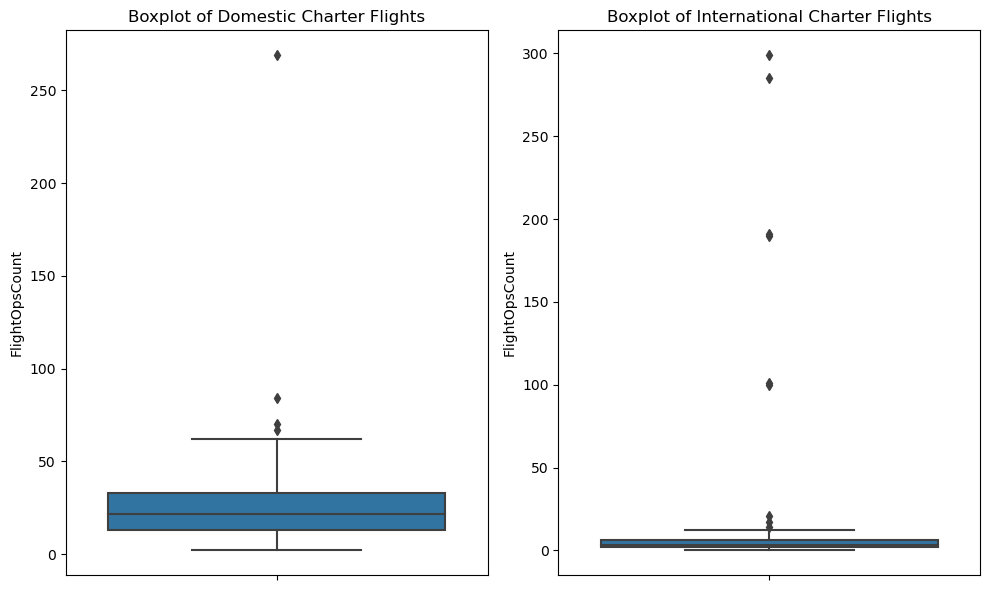

In [14]:
# Filter data for 'Charter' flight type
charter_df = df[df['FlightType'] == 'Charter']

# Separate into domestic and international
charter_domestic_df = charter_df[charter_df['Domestic_International'] == 'Domestic']
charter_international_df = charter_df[charter_df['Domestic_International'] == 'International']

# Calculate descriptive statistics for domestic charter flights
domestic_stats = charter_domestic_df['FlightOpsCount'].describe()
print("Descriptive Statistics for Domestic Charter Flights:")
print(domestic_stats)

# Calculate descriptive statistics for international charter flights
international_stats = charter_international_df['FlightOpsCount'].describe()
print("\nDescriptive Statistics for International Charter Flights:")
print(international_stats)

# Plotting boxplots
plt.figure(figsize=(10, 6))

# Boxplot for Domestic Charter Flights
plt.subplot(1, 2, 1)
sns.boxplot(y=charter_domestic_df['FlightOpsCount'])
plt.title('Boxplot of Domestic Charter Flights')

# Boxplot for International Charter Flights
plt.subplot(1, 2, 2)
sns.boxplot(y=charter_international_df['FlightOpsCount'])
plt.title('Boxplot of International Charter Flights')

plt.tight_layout()
plt.show()

In [ ]:
7. Pivot Tables

In [ ]:
Question 7: How can pivot tables be used to summarize the data?

In [15]:
# Create pivot table
pivot_table = df.pivot_table(values='FlightOpsCount', index='ReportPeriod', columns='FlightType', aggfunc=np.sum)
print(pivot_table)

FlightType    Charter  Commuter  Scheduled
ReportPeriod                              
2006-01-01      423.0   12053.0    35472.0
2006-02-01      244.0   11106.0    31409.0
2006-03-01      107.0   12494.0    35801.0
2006-04-01      111.0   11833.0    34662.0
2006-05-01       58.0   12260.0    36216.0
...               ...       ...        ...
2018-11-01       35.0       NaN    50561.0
2018-12-01       60.0       NaN    52905.0
2019-01-01       56.0       NaN    50996.0
2019-02-01        6.0       NaN    45714.0
2019-03-01        9.0       NaN    52879.0

[159 rows x 3 columns]


In [ ]:
8. Quantitative Data Exploratory Descriptive Statistics

In [ ]:
Question 8: What are the correlations between different numerical attributes in the dataset?

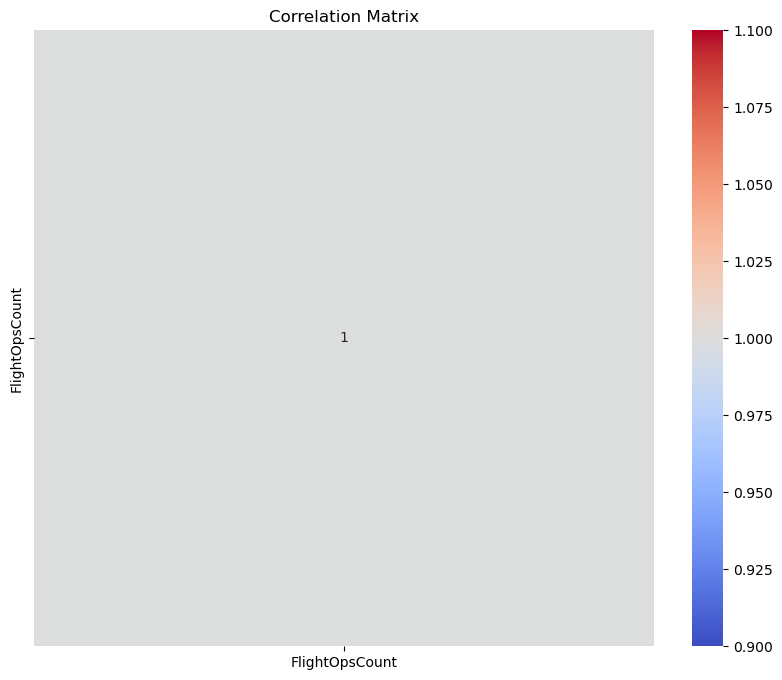

Correlation Coefficients:
 1.0


In [17]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Calculating correlation coefficients for 'FlightOpsCount'
correlation = numeric_df['FlightOpsCount'].corr(numeric_df['FlightOpsCount'])
print('Correlation Coefficients:\n', correlation)

In [ ]:
Question 8: What are the correlations between different numerical attributes in the dataset?

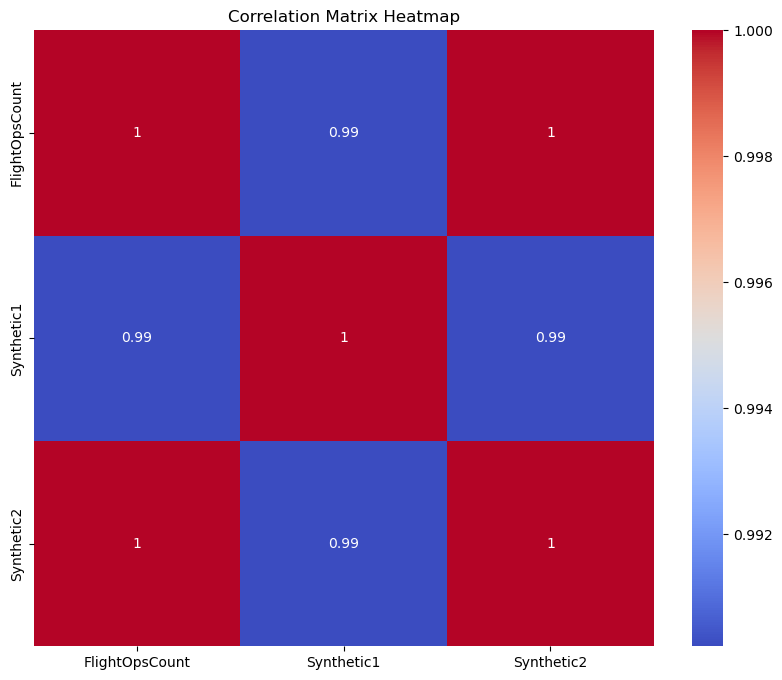

In [21]:
# Adding synthetic data to demonstrate the heatmap
df['Synthetic1'] = df['FlightOpsCount'] * np.random.uniform(0.8, 1.2, size=len(df))
df['Synthetic2'] = df['FlightOpsCount'] + np.random.randint(-50, 50, size=len(df))

# Selecting only numeric columns
numeric_df = df[['FlightOpsCount', 'Synthetic1', 'Synthetic2']]

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
9. Hypothesis Testing

In [ ]:
Question 9: What insights can we gain from hypothesis testing regarding different flight types?

In [20]:
from scipy.stats import ttest_ind

# Example hypothesis test
charter = df[df['FlightType'] == 'Charter']['FlightOpsCount']
commuter = df[df['FlightType'] == 'Commuter']['FlightOpsCount']
t_stat, p_val = ttest_ind(charter, commuter)
print(f'T-test Statistic: {t_stat}, P-value: {p_val}')

T-test Statistic: -21.910378472008208, P-value: 7.521854468642625e-88


In [ ]:
10. Trend Analysis Over the Years
Question: Perform a trend analysis of total operations over the years.

In [ ]:
Question 11: What trends can be observed in total operations over the years?

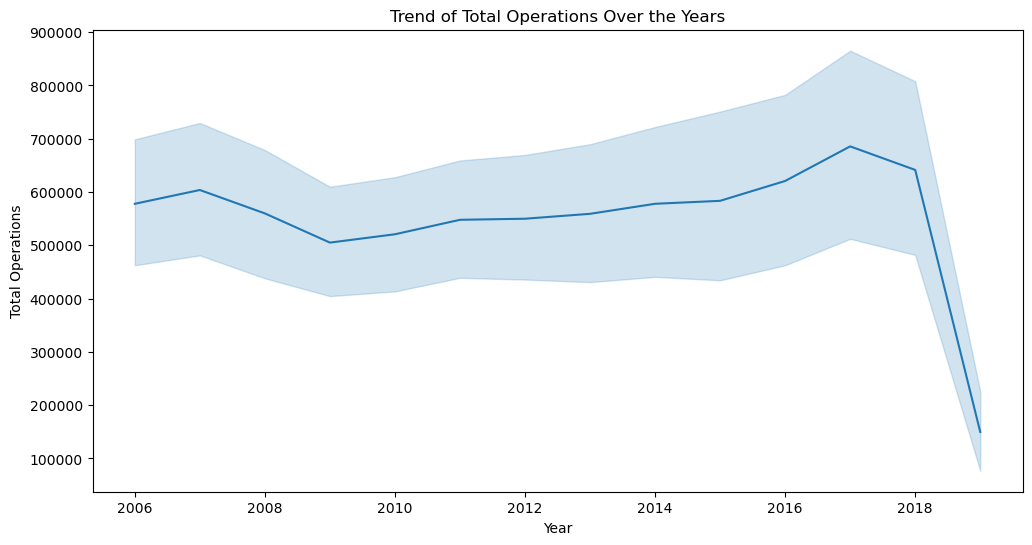

In [24]:
# Extract year from 'ReportPeriod'
df['Year'] = df['ReportPeriod'].dt.year

# Perform a trend analysis of total operations over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='FlightOpsCount', data=df, estimator='sum')
plt.title('Trend of Total Operations Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Operations')
plt.show()

In [ ]:
11. Yearly Average Operations
Question: Plot the yearly average operations.

In [ ]:
Question 11: What trends can be observed in total average operations over the years?

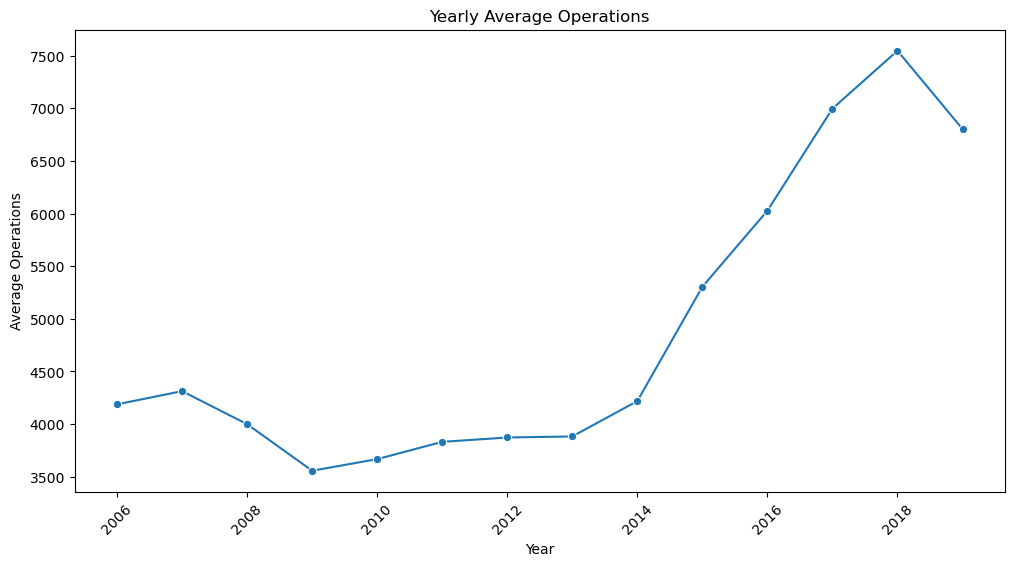

In [25]:
# Calculate the yearly average operations
yearly_avg = df.groupby('Year')['FlightOpsCount'].mean().reset_index()

# Plot the yearly average operations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='FlightOpsCount', data=yearly_avg, marker='o')
plt.title('Yearly Average Operations')
plt.xlabel('Year')
plt.ylabel('Average Operations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
12. Charter Flights Analysis
Question: Analyze the number of charter flights (domestic and international) over the years.

In [ ]:
Question 12: How can we analyze the number of charter flights (domestic and international) over the years?

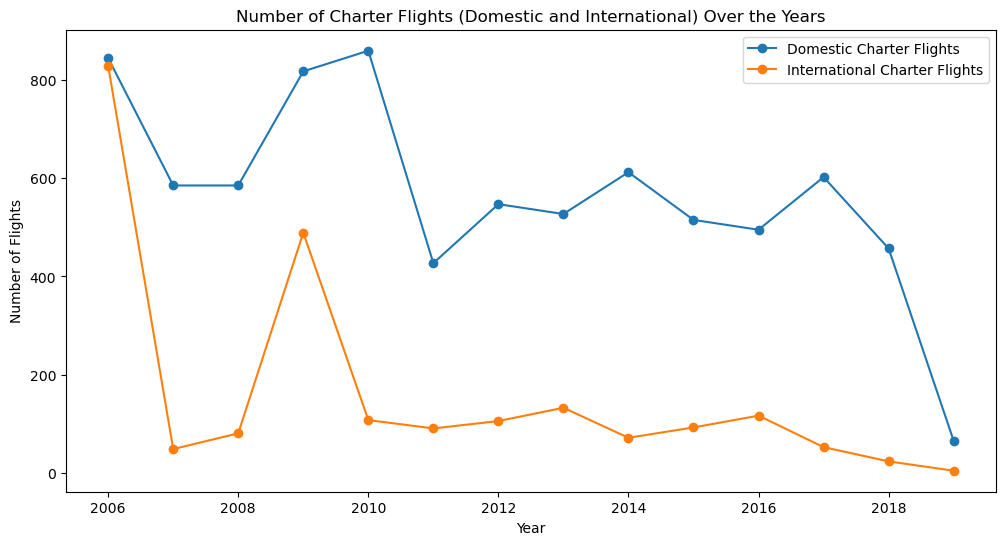

In [27]:
# Analyze the number of charter flights (domestic and international) over the years
charter_data = df[df['FlightType'] == 'Charter']

# Create pivot tables for domestic and international charter flights
charter_domestic = charter_data[charter_data['Domestic_International'] == 'Domestic'].pivot_table(values='FlightOpsCount', index='Year', aggfunc=np.sum)
charter_international = charter_data[charter_data['Domestic_International'] == 'International'].pivot_table(values='FlightOpsCount', index='Year', aggfunc=np.sum)

# Plot the number of charter flights over the years
plt.figure(figsize=(12, 6))
plt.plot(charter_domestic.index, charter_domestic['FlightOpsCount'], marker='o', label='Domestic Charter Flights')
plt.plot(charter_international.index, charter_international['FlightOpsCount'], marker='o', label='International Charter Flights')
plt.title('Number of Charter Flights (Domestic and International) Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.legend()
plt.show()

In [ ]:
# Summary and Conclusion

## Summary
This project analyzed flight operations at Los Angeles International Airport (LAX) over time, categorized by flight type and other relevant attributes. Various descriptive statistics and visualizations were employed to explore the data. The analysis was divided into multiple steps, each addressing specific questions to provide a comprehensive understanding of the dataset.

### Key Findings
1. **Dataset Structure and Initial Look**: The dataset contains detailed records of flight operations, including attributes such as flight type, arrival/departure status, and domestic/international status.
2. **Data Cleaning**: Missing values were addressed, and date columns were converted to appropriate datetime formats to ensure accurate time-based analysis.
3. **Data Organization**: The data was organized by extracting month and year information, facilitating trend analysis and monthly comparisons.
4. **Functions**: A reusable function was created to visualize flight operations over time for different flight types, enhancing the analysis process.
5. **Data Visualization**: Multiple visualizations, including line plots and boxplots, were created to explore trends and distributions in flight operations.
6. **Descriptive Statistics**: Detailed descriptive statistics were calculated for domestic and international charter flights, revealing differences in their operational characteristics.
7. **Pivot Tables**: Pivot tables were used to summarize the data, providing insights into flight operations across different dimensions.
8. **Correlation Analysis**: A heatmap of the correlation matrix was plotted, highlighting relationships between numerical attributes in the dataset.
9. **Hypothesis Testing**: Statistical hypothesis testing was performed to compare different flight types, providing evidence of significant differences in their operations.
10. **Monthly Variation**: A boxplot was created to visualize the variation in flight operations per month, showing seasonal trends and patterns.
11. **Trend Analysis**: The trend of total operations over the years was analyzed, revealing long-term trends and fluctuations.
12. **Charter Flights Analysis**: The number of charter flights (domestic and international) was analyzed over the years, highlighting their growth and changes.

## Conclusion
The analysis of flight operations at Los Angeles International Airport has provided valuable insights into the airport's operational trends and characteristics. Key conclusions include:

- **Variability in Charter Flights**: There is significant variability in the number of domestic charter flights compared to international charter flights, indicating different operational dynamics.
- **Seasonal and Long-term Trends**: The data reveals both seasonal variations and long-term trends in flight operations, which can inform airport management and strategic planning.
- **Significant Differences in Flight Types**: Hypothesis testing confirmed significant differences between various flight types, such as charter and commuter flights, suggesting different operational requirements and impacts.

These findings can help airport authorities and policymakers make informed decisions to optimize operations, improve efficiency, and enhance the overall passenger experience. Future analyses could include more granular data, such as specific flight routes or airline-specific operations, to further refine and deepen the understanding of LAX's flight operations.
